# Project 2


## 1. Introduction

In this project, we take a look at the Top100 Billboard charts for songs in year 2000. The required tasks are:

- Include a problem statement
- State the risks and assumptions of the data
- Import data using the Pandas library
- Perform exploratory data analysis
- Use Tableau and/or Python plotting modules to visualize data
- Observe correlations in the data
- Evaluate a hypothesis
- Present results in a polished companion blog post of at least 500 words (& 1-2 graphics!)


## 2. Problem statement(s)

My approach to creating problem statements is to adopt an industry-profitability view. To put myself in the shoes of someone in the music industry who are looking for songs that maximises profitability. 

With this as a basis, and since this is already a Top100 dataset, the problem identification portion can be distilled to two main factors:

1. Position on chart

2. Duration on chart

*$$We\ want\ Top100\ songs\ that\ stay\ high\ on\ the\ charts\ for\ a\ long\ time!$$*

### a. Hypotheses:

1. Songs that entered Top100 during autumn months (Sep, Oct and Nov) stayed in Top100 longer.
2. Songs that peaked quickly had lower average weekly positions.

### b. Assumptions and risks:

- All given data is accurate.
   
   - We cannot be certain that the data was reproduced accurately. Typically, in such situation, it may be wise to create a smaller sample from this dataset and compare the sample to a "gold standard" for accuracy, if available, especially for data from an older time period, when human was part of the data-entry process.


- All given data is comprehensive and accurately reflects the scene of music industry in 2000.

   - Billboard charts took sales + radio airplay numbers to determine the Top100 position in 2000 (paid digital download became a feature only after [2005](https://en.wikipedia.org/wiki/Billboard_charts). The assumption is that these 2 features captured the popularity of songs in entirety, even though digital formats (mp3) were already widely available then. The risk then, is that, the positions did not completely represent the popularity of the songs.


## 3. Data munging

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import csv
import pprint as pprint
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')

In [2]:
bb_df = pd.read_csv('assets/billboard.csv')
bb_df.head(3)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78,63,49,...,*,*,*,*,*,*,*,*,*,*
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15,8,6,...,*,*,*,*,*,*,*,*,*,*
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71,48,43,...,*,*,*,*,*,*,*,*,*,*


In [3]:
bb_df.describe()

,year,x1st.week
count,317.0,317.000000
mean,2000.0,79.958991
std,0.0,14.686865
min,2000.0,15.000000
25%,2000.0,74.000000
50%,2000.0,81.000000
75%,2000.0,91.000000
max,2000.0,100.000000


In [4]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 317 entries, 0 to 316
Data columns (total 83 columns):
year               317 non-null int64
artist.inverted    317 non-null object
track              317 non-null object
time               317 non-null object
genre              317 non-null object
date.entered       317 non-null object
date.peaked        317 non-null object
x1st.week          317 non-null int64
x2nd.week          317 non-null object
x3rd.week          317 non-null object
x4th.week          317 non-null object
x5th.week          317 non-null object
x6th.week          317 non-null object
x7th.week          317 non-null object
x8th.week          317 non-null object
x9th.week          317 non-null object
x10th.week         317 non-null object
x11th.week         317 non-null object
x12th.week         317 non-null object
x13th.week         317 non-null object
x14th.week         317 non-null object
x15th.week         317 non-null object
x16th.week         317 non-null object


In [5]:
bb_df.dtypes

year                int64
artist.inverted    object
track              object
time               object
genre              object
date.entered       object
date.peaked        object
x1st.week           int64
x2nd.week          object
x3rd.week          object
x4th.week          object
x5th.week          object
x6th.week          object
x7th.week          object
x8th.week          object
x9th.week          object
x10th.week         object
x11th.week         object
x12th.week         object
x13th.week         object
x14th.week         object
x15th.week         object
x16th.week         object
x17th.week         object
x18th.week         object
x19th.week         object
x20th.week         object
x21st.week         object
x22nd.week         object
x23rd.week         object
                    ...  
x47th.week         object
x48th.week         object
x49th.week         object
x50th.week         object
x51st.week         object
x52nd.week         object
x53rd.week         object
x54th.week  

In [7]:
# replacing cells in the weeks columns that contained "*" with "NaN"
bb_df.iloc[:, 7:] = bb_df.iloc[:, 7:].replace('*', np.nan)

In [8]:
# Converting weekly chart positions from string to float

def to_float(x):
    try:
        y = float(x)
    except:
        y = x
    return y

bb_df.iloc[:, 7:83] = bb_df.iloc[:, 7:83].applymap(to_float)

In [9]:
bb_df.head(3)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78.0,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15.0,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71.0,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Summing the total number of weeks on charts

bb_df['time_on_bb_weeks'] = bb_df.iloc[:, 7:].count(axis = 1)
bb_df.head(3)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,time_on_bb_weeks
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,"September 23, 2000","November 18, 2000",78.0,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,"February 12, 2000","April 8, 2000",15.0,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,"October 23, 1999","January 29, 2000",71.0,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33


In [11]:
# Converting dates from strings to pandas datetime format

bb_df[['date.entered', "date.peaked"]] = bb_df[['date.entered', "date.peaked"]].apply(pd.to_datetime)

bb_df.head(3)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,time_on_bb_weeks
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,1999-10-23,2000-01-29,71.0,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33


In [12]:
# Number of songs per genre

bb_df['genre'].value_counts()

Rock           103
Country         74
Rap             58
Rock'n'roll     34
R&B             13
R & B           10
Pop              9
Latin            9
Electronica      4
Gospel           1
Jazz             1
Reggae           1
Name: genre, dtype: int64

#### Comments:

This shows that the dataset is very biased towards "Rock" genre, taking up about 1/3 of the the entire data. Therefore, without more data, analysis comparing performance based on genres may yield unreliable results.

In [13]:
# R&B genre had 2 variants and should be combined

# Defining a function to combine both R&B genres
def clean_genre(x):
    if x == "R & B":
        x = "R&B"
    return x

In [14]:
# Applying the R&B cleaning function to genre column

bb_df['genre'] = bb_df['genre'].apply(clean_genre)
bb_df.head(3)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,time_on_bb_weeks
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,1999-10-23,2000-01-29,71.0,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33


In [15]:
# Number of songs per Artist in dataset

bb_df['artist.inverted'].value_counts()

Jay-Z                           5
Houston, Whitney                4
Dixie Chicks, The               4
DMX                             3
Aguilera, Christina             3
McGraw, Tim                     3
Backstreet Boys, The            3
Thomas, Carl                    3
N'Sync                          3
Destiny's Child                 3
SheDaisy                        3
Sisqo                           3
Braxton, Toni                   3
Limp Bizkit                     3
Price, Kelly                    3
Spears, Britney                 3
Rimes, LeAnn                    3
Eminem                          3
Lonestar                        3
Martin, Ricky                   3
Jackson, Alan                   3
Jagged Edge                     2
McEntire, Reba                  2
3 Doors Down                    2
D'Angelo                        2
Eve                             2
Nine Days                       2
Anthony, Marc                   2
Paisley, Brad                   2
Hill, Faith   

#### Comments:

The artist with the highest number of songs on Top100 in 2000 was Jay-Z and he only had 5 songs on the Top100 in 2000. Similar to "genre", this made analyses comparing artists unreliable since most artists only had 1 song on the charts.

In [16]:
# Cleaning song duration column

# Function to return duration in seconds of songs, taking a string as input
# This function checks to make sure format of duration in "m,s,ms", since without more information,
# we can't assume the format of the data.
def get_duration(str_time):
    str_time = str_time.split(',')
    
    # Returns a message if the seconds portion is in decimals instead of seconds
    if float(str_time[1]) > 60:
        print "seconds out of range"
    
    # Returns a message if the microseconds portion is not in microseconds
    if float(str_time[2].split()[0]) > 60:
        print "micro seconds out of range"
             
    output = (float(str_time[0])* 60.) + (float(str_time[1])) + (float(str_time[2].split()[0]) / 60)
    return output

In [17]:
# Convert song duration to seconds
bb_df['song_len'] = bb_df['time'].apply(get_duration)
bb_df.head(3)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,time_on_bb_weeks,song_len
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28,218.0
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26,258.0
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,1999-10-23,2000-01-29,71.0,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,247.0


## 4. Creating new features

In [18]:
# Extracting month and year entered from dates

bb_df['month_entered'] = bb_df['date.entered'].dt.month
bb_df['year_entered'] = bb_df['date.entered'].dt.year
bb_df.head(3)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,time_on_bb_weeks,song_len,month_entered,year_entered
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,28,218.0,9,2000
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,26,258.0,2,2000
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,1999-10-23,2000-01-29,71.0,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,33,247.0,10,1999


In [19]:
# Checking the distribution of songs via year and month entered.

pd.pivot_table(bb_df, index = ['year_entered', 'month_entered'], values = 'time_on_bb_weeks', aggfunc='count')

year_entered  month_entered
1999          6                 1
              7                 1
              9                 2
              10                9
              11               16
              12               21
2000          1                29
              2                25
              3                27
              4                33
              5                21
              6                22
              7                21
              8                29
              9                25
              10               17
              11               12
              12                6
Name: time_on_bb_weeks, dtype: int64

In [20]:
# Function to bin months into seasons

def bin_season(x):
    if x in [12, 1, 2]:
        season = 'Winter'
    elif x in [3,4,5]:
        season = 'Spring'
    elif x in [6,7,8]:
        season = 'Summer'
    else:
        season = 'Autumn'
    
    return season

In [21]:
# Create a new feature "Season" by binning the month_entered column into 4 categories

bb_df['Season_entered'] = bb_df["month_entered"].apply(bin_season)
bb_df.head(3)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week,time_on_bb_weeks,song_len,month_entered,year_entered,Season_entered
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,28,218.0,9,2000,Autumn
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,26,258.0,2,2000,Winter
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,1999-10-23,2000-01-29,71.0,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,33,247.0,10,1999,Autumn


In [22]:
# Create a new feature "Time_to_peak" in days

bb_df['Time_to_peak'] = bb_df['date.peaked'] - bb_df['date.entered']
bb_df.head(3)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x73rd.week,x74th.week,x75th.week,x76th.week,time_on_bb_weeks,song_len,month_entered,year_entered,Season_entered,Time_to_peak
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,...,NaN,NaN,NaN,NaN,28,218.0,9,2000,Autumn,56 days
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,...,NaN,NaN,NaN,NaN,26,258.0,2,2000,Winter,56 days
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,1999-10-23,2000-01-29,71.0,48.0,43.0,...,NaN,NaN,NaN,NaN,33,247.0,10,1999,Autumn,98 days


In [23]:
# Function to converting days to float in weeks (standardised time unit in this project)
# Also check to make sure all cells are days
def clean_time(x):
    x = str(x)
    x = x.split()
    if x[1] != "days":
        print "'days' not in cell"
    else:
        output = round(int(x[0])/7,2)
    return output

In [24]:
bb_df['Time_to_peak'] = bb_df['Time_to_peak'].apply(clean_time)
bb_df.head(3)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x73rd.week,x74th.week,x75th.week,x76th.week,time_on_bb_weeks,song_len,month_entered,year_entered,Season_entered,Time_to_peak
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,...,NaN,NaN,NaN,NaN,28,218.0,9,2000,Autumn,8.0
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,...,NaN,NaN,NaN,NaN,26,258.0,2,2000,Winter,8.0
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,1999-10-23,2000-01-29,71.0,48.0,43.0,...,NaN,NaN,NaN,NaN,33,247.0,10,1999,Autumn,14.0


In [25]:
# Extracting the peak position on charts
bb_df['Peak_position'] = bb_df.iloc[:, 7:83].min(axis = 1)
bb_df.head(3)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x74th.week,x75th.week,x76th.week,time_on_bb_weeks,song_len,month_entered,year_entered,Season_entered,Time_to_peak,Peak_position
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,...,NaN,NaN,NaN,28,218.0,9,2000,Autumn,8.0,1.0
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,...,NaN,NaN,NaN,26,258.0,2,2000,Winter,8.0,1.0
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,1999-10-23,2000-01-29,71.0,48.0,43.0,...,NaN,NaN,NaN,33,247.0,10,1999,Autumn,14.0,1.0


In [26]:
# Checking to see if there were songs still in on charts at 76th week
# We want to calculate the proportion of time a song took to reach its peak over the duration it was on charts
# If there were songs which just entered the chart near 76th week and was just starting to rise on the chart, these
# will affect the results of the proportion.

print sum(bb_df['x76th.week'].fillna(0))
print sum(bb_df['x75th.week'].fillna(0))
print sum(bb_df['x74th.week'].fillna(0))
print sum(bb_df['x73rd.week'].fillna(0))
print sum(bb_df['x72nd.week'].fillna(0))

# We can conclude that this dataset allowed songs that were still on charts at the end of 2000 to continue
# which explained the columns beyond "x52nd.week".
# This dataset contained songs that were on Top100 in year 2000, regardless of when they entered the chart
#(could be before 2000), and regardless of when the songs left Top100 (could be in 2001)

# Therefore, we proceeded to create the new feature of "Time_to_peak_prop".

0.0
0.0
0.0
0.0
0.0


In [27]:
# Create a new column for proportion of time a song took to reach peak position

bb_df['Time_to_peak_prop'] = (bb_df['Time_to_peak'] / bb_df['time_on_bb_weeks'])
bb_df.head(3)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x75th.week,x76th.week,time_on_bb_weeks,song_len,month_entered,year_entered,Season_entered,Time_to_peak,Peak_position,Time_to_peak_prop
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,...,NaN,NaN,28,218.0,9,2000,Autumn,8.0,1.0,0.285714
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,...,NaN,NaN,26,258.0,2,2000,Winter,8.0,1.0,0.307692
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,1999-10-23,2000-01-29,71.0,48.0,43.0,...,NaN,NaN,33,247.0,10,1999,Autumn,14.0,1.0,0.424242


In [29]:
# Binning the proportionate time to peak into 2 bins: 'Peaked_early', 'Peaked_late'

bb_df['Time_to_peak_bin'] = pd.qcut(bb_df['Time_to_peak_prop'], 2, ['Peaked_early', 'Peaked_late'], precision = 3)
bb_df.head(2)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,time_on_bb_weeks,song_len,month_entered,year_entered,Season_entered,Time_to_peak,Peak_position,Time_to_peak_prop,Avg_position,Time_to_peak_bin
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,...,28,218.0,9,2000,Autumn,8.0,1.0,0.285714,14.821429,Peaked_early
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,...,26,258.0,2,2000,Winter,8.0,1.0,0.307692,10.500000,Peaked_early


In [28]:
# Create a new column for average positions on chart

bb_df['Avg_position'] = (bb_df.iloc[:, 7:83].sum(axis = 1))/bb_df['time_on_bb_weeks']
bb_df.head(3)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x76th.week,time_on_bb_weeks,song_len,month_entered,year_entered,Season_entered,Time_to_peak,Peak_position,Time_to_peak_prop,Avg_position
0,2000,Destiny's Child,Independent Women Part I,"3,38,00 AM",Rock,2000-09-23,2000-11-18,78.0,63.0,49.0,...,NaN,28,218.0,9,2000,Autumn,8.0,1.0,0.285714,14.821429
1,2000,Santana,"Maria, Maria","4,18,00 AM",Rock,2000-02-12,2000-04-08,15.0,8.0,6.0,...,NaN,26,258.0,2,2000,Winter,8.0,1.0,0.307692,10.500000
2,2000,Savage Garden,I Knew I Loved You,"4,07,00 AM",Rock,1999-10-23,2000-01-29,71.0,48.0,43.0,...,NaN,33,247.0,10,1999,Autumn,14.0,1.0,0.424242,17.363636


In [30]:
# Creating a new dataframe with selected columns
bb_small_df = bb_df.loc[:, ["genre",'song_len',\
                            'year_entered', 'Season_entered', 'month_entered',\
                            'time_on_bb_weeks', "Time_to_peak", 'Time_to_peak_prop', 'Time_to_peak_bin',\
                            "Peak_position", 'Avg_position']]
bb_small_df.head(3)

,genre,song_len,year_entered,Season_entered,month_entered,time_on_bb_weeks,Time_to_peak,Time_to_peak_prop,Time_to_peak_bin,Peak_position,Avg_position
0,Rock,218.0,2000,Autumn,9,28,8.0,0.285714,Peaked_early,1.0,14.821429
1,Rock,258.0,2000,Winter,2,26,8.0,0.307692,Peaked_early,1.0,10.500000
2,Rock,247.0,1999,Autumn,10,33,14.0,0.424242,Peaked_late,1.0,17.363636


## 5. Univariate analyses

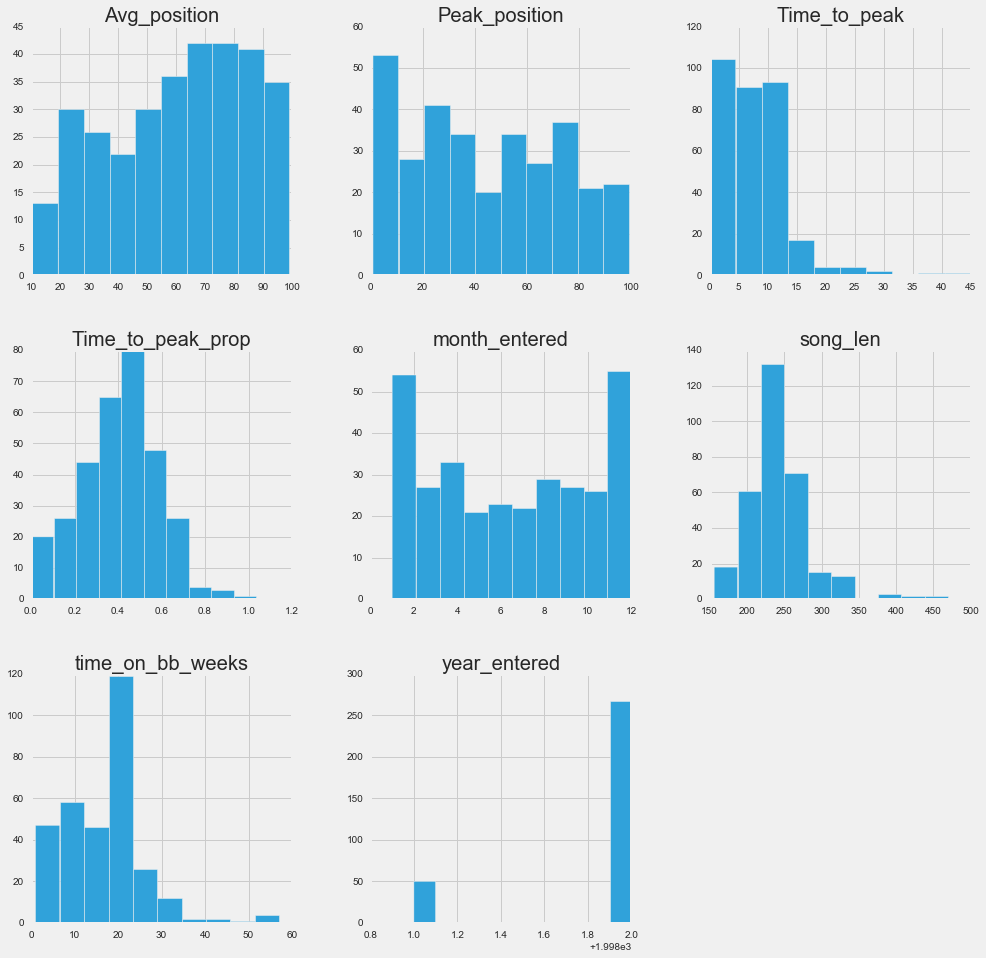

In [31]:
# Overview of histograms

bb_small_df.hist(figsize=(15,15));

### Comments:

As mentioned earlier, from the prediction marketability/profitability viewpoint, we are really only interested in 2 variables:

1. Position
2. Time on chart

Nevertheless, the rest of the histograms were included for discussion purposes.

Now, to get the actual analysis out of the way first, let's look at histograms associated with the 2 variables.

### a. Duration on charts

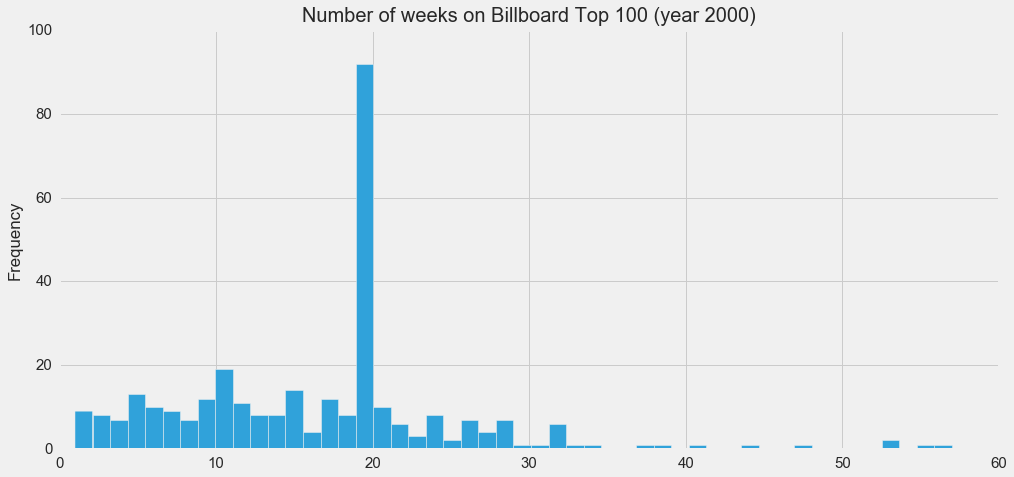

In [96]:
bb_small_df['time_on_bb_weeks'].plot(kind = 'hist', figsize = (15,7),\
                                     bins = 50,\
                                    fontsize = 15\
                                    ).set_title('Number of weeks on Billboard Top 100 (year 2000)', \
                                                fontsize = 20, y = 1.01)

plt.savefig('hist_time_on_chart.png');

An overwhelming number of songs stayed on the chart for about 20 weeks. However, the distribution is rather positively skewed. More songs stayed less than 20 weeks compared to longer-lived "unicorns". The implications to our analyses here is that we should use "median" more so than "mean" for duration based statistics.

Furthermore, the distribution is also clearly non-normal, a normality test will be conducted later in the statistical testing portion. This would affect the type of statistical testings that could be performed on the data.

### b. Average position on chart

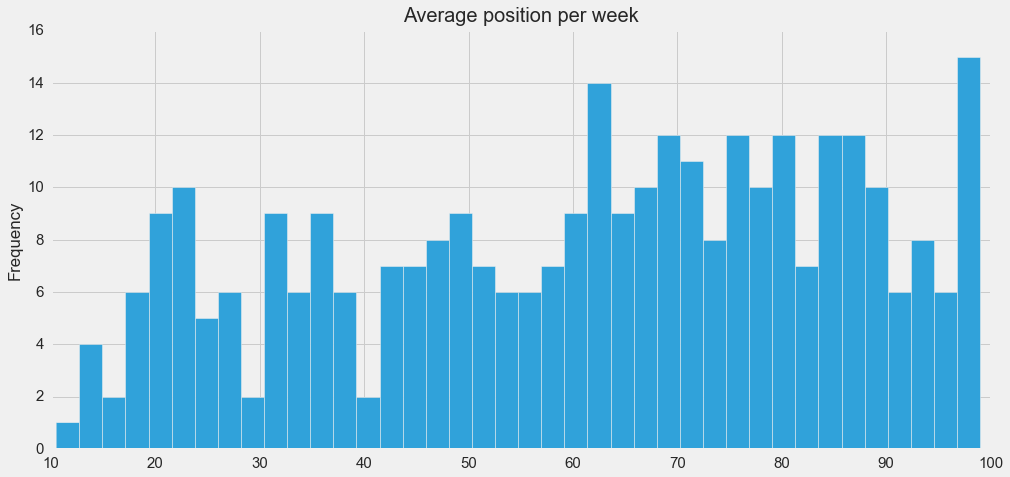

In [97]:
bb_small_df['Avg_position'].plot(kind = 'hist', figsize = (15,7),\
                                 bins = 40, fontsize = 15\
                                ).set_title('Average position per week', fontsize = 20, y = 1.01)
plt.savefig('hist_avg_position.png');

#### Comments:

Most songs had average positions near 100. Most songs clustered between 60th and 100th positions. There was a small "unicorn" cluster from 10th to 30th position.

The high number of songs at the 100 position should represent "above average" songs which just made it to the Top 100 but couldn't quite stay there before they were dropped altogether.

Similarly, the distribution was clearly non-normal, normality tests would be conducted for verification later.

## 6. Bivariate Analyses

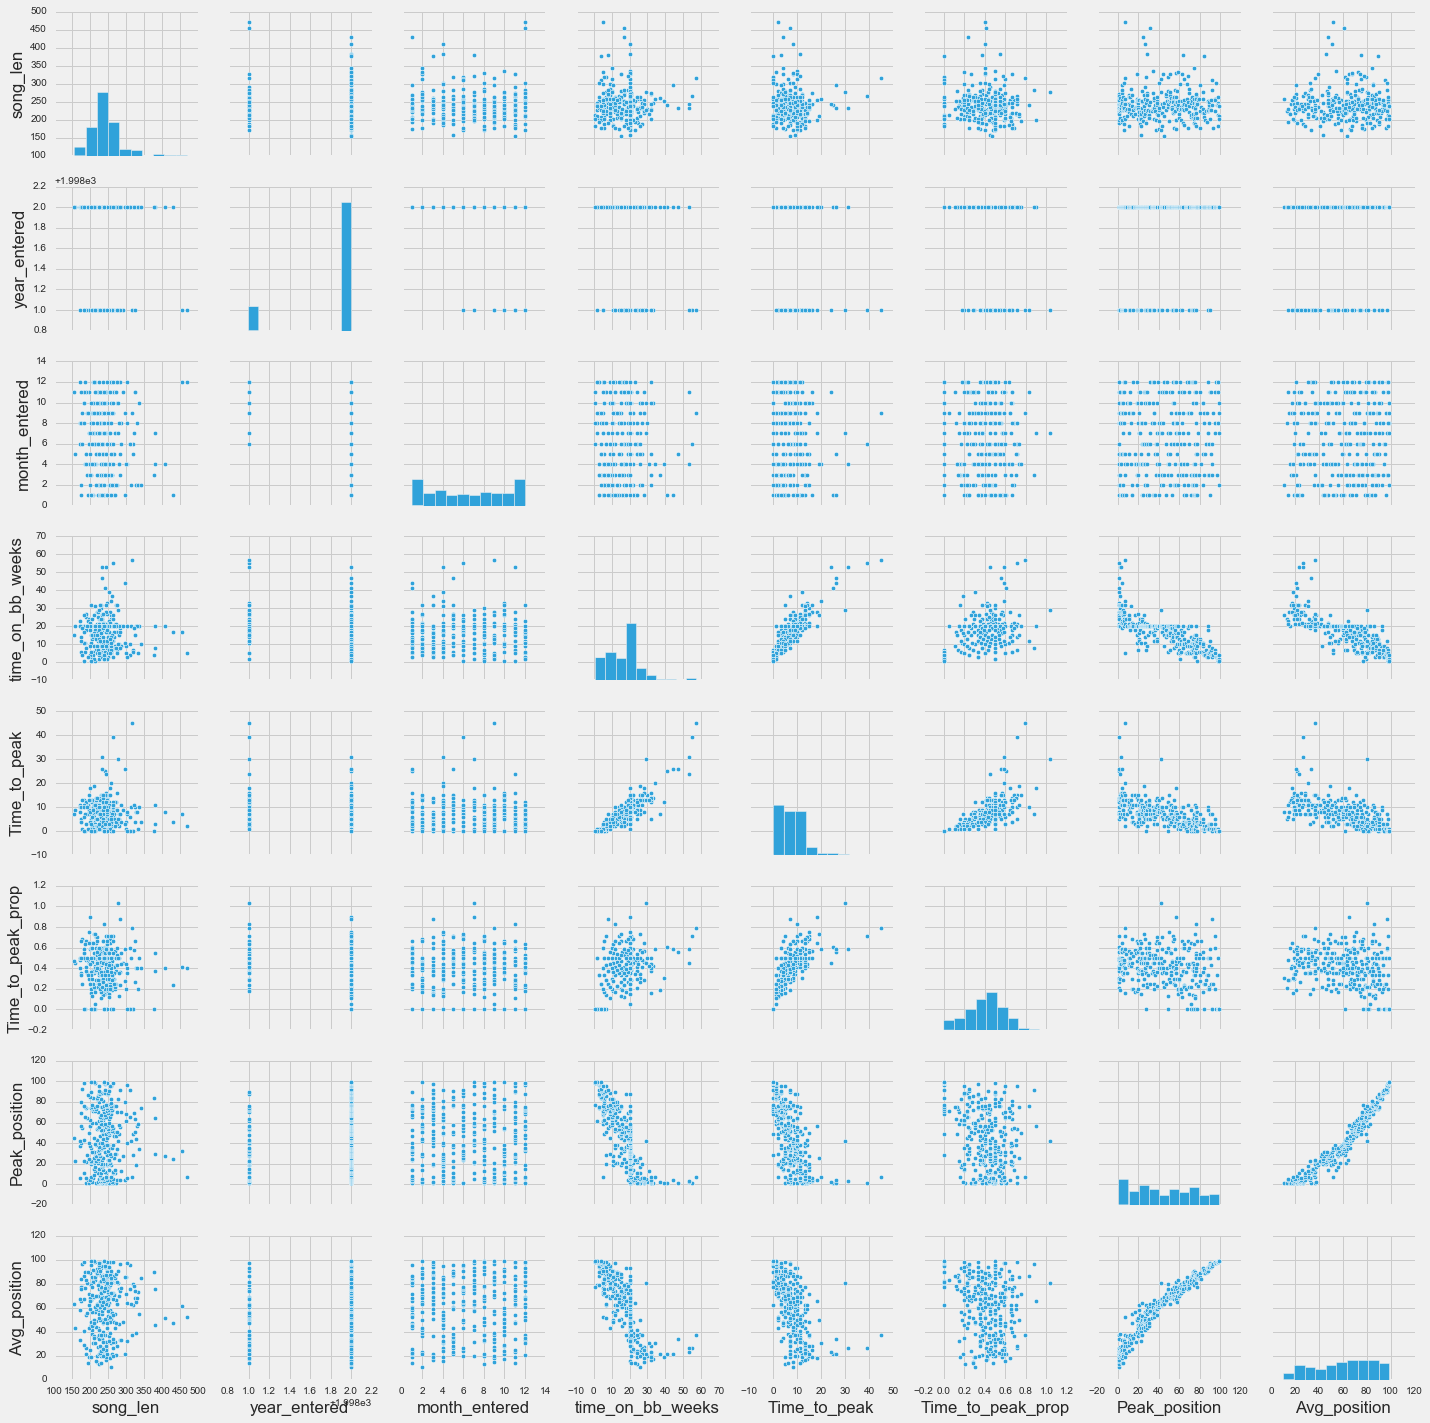

In [34]:
# Overview using pairplots
sns.pairplot(data=bb_small_df)
plt.rcParams['figure.figsize']=(15,15);

#### Comments:

The plot which was immediately obvious was "Average position vs peak position" as it looked almost linear.

Intuitively, songs with lower peak positions should have lower average position since these low positions will serve to bring down the average of the positions. Therefore, an approximately linear relationship is expected.    

### a. Scatter plot of Average position vs time on bb charts

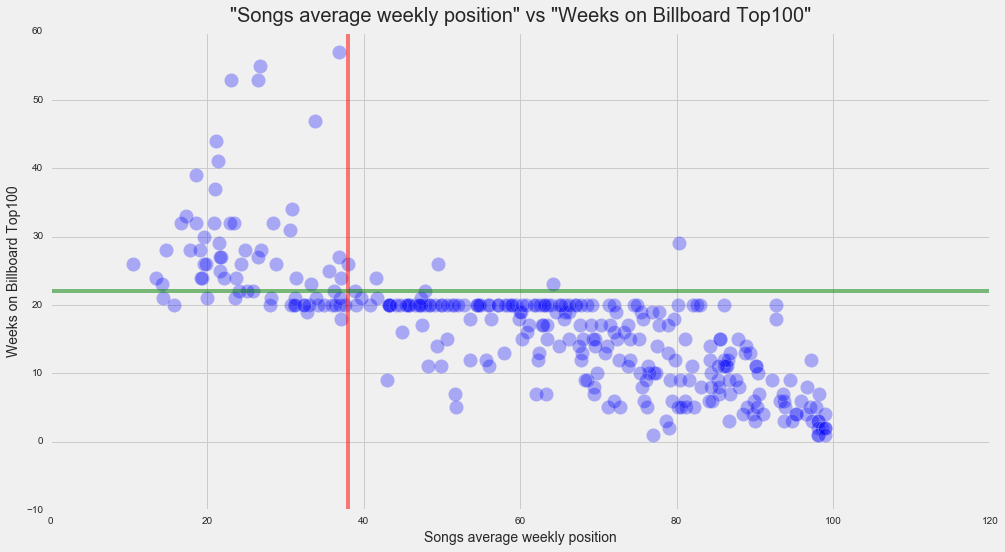

In [98]:
fig, ax = plt.subplots(1,1, figsize = (15,8))

ax.scatter(x = bb_small_df["Avg_position"], y = bb_small_df['time_on_bb_weeks'],\
                s = 200, alpha = 0.3)

ax.axvline(x = 38, color = 'r', alpha = 0.5)
ax.axhline(y = 22, color = 'g', alpha = 0.5)

ax.set_title('"Songs average weekly position" vs "Weeks on Billboard Top100"', fontsize = 20, y = 1.01)
ax.set_xlabel("Songs average weekly position", fontsize = 14);
ax.set_ylabel("Weeks on Billboard Top100", fontsize = 14)

plt.savefig('scatter_pos_vs_time.png');

#### Comments:

This chart showed clearly that there were 2 distinct groups of songs: below 40 and above 40 in average weekly position.

- Must stay below 40th average position

    In the group with average position above 40, we see clearly that songs that fell within this group almost certainly did not stay on the chart for more than 20 weekly (with the exception of a few outliers). Even for those that made it past 20 weeks, the longest any song stayed was about 30 weeks.
    

- Lowest average position = best songs?

    When we observe the density of the blue dots, we note the clear median line at 20 weeks on chart (dark blue area, i.e. more songs overlap here). In the upper left quadrant, we note a small group of song cluster around average position of 20 but only stayed on the charts for about 40 weeks.
    

- So, where are the unicorns?

    The most interesting phenomenon is that songs with the best average weekly positions were not the ones which stayed on the charts the longest. We need to examine this in greater detail in the multivariate analyses later, but this indicates that there was a sweet spot of hitting average weekly position of between 20 and 40, where there was a chance of becoming "unicorns" that last more than a year on the charts.

### b. Scatter plot of Average position vs Proportion time taken to peak

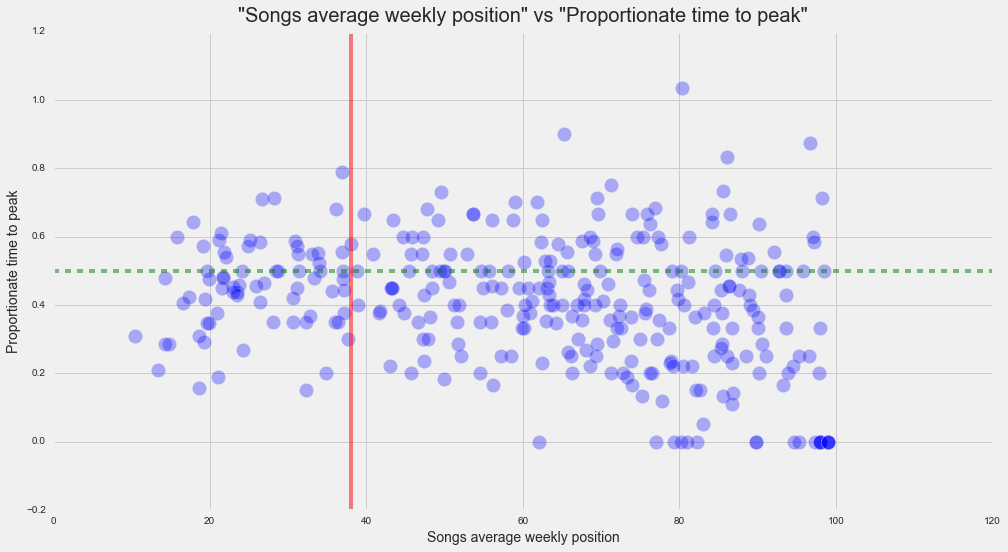

In [36]:
fig, ax = plt.subplots(1,1, figsize = (15,8))

ax.scatter(x = bb_small_df["Avg_position"], y = bb_small_df['Time_to_peak_prop'],\
                s = 200, alpha = 0.3)

ax.axvline(x = 38, color = 'r', alpha = 0.5)
ax.axhline(y = 0.5,  linestyle='--', color = 'g', alpha = 0.5)

ax.set_title('"Songs average weekly position" vs "Proportionate time to peak"', fontsize = 20, y = 1.01)
ax.set_xlabel("Songs average weekly position", fontsize = 14);
ax.set_ylabel("Proportionate time to peak", fontsize = 14);

#### Comments:

Unlike the previous chart, there is no clear distinctions here. 

We included the same red line at average weekly position of 38, the main difference with the songs to the left and right of the red line is that songs that averaged higher position had a higher variance of "proportionate time to peak".

A dash green line is also included in the chart at 50th percentile. We can see that more songs reach their peak before they hit the half-way mark of their stay on the charts (indicated by more dots below the green line).

There is an interesting data point with "proportionate time to peak" more than 1.0. We will examine this further.

In [37]:
bb_df[bb_df['Time_to_peak_prop'] > 1]

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,time_on_bb_weeks,song_len,month_entered,year_entered,Season_entered,Time_to_peak,Peak_position,Time_to_peak_prop,Avg_position,Time_to_peak_bin
157,2000,Amber,Sexual (Li Da Di),"4,38,00 AM",Rock,1999-07-17,2000-02-12,99.0,99.0,96.0,...,29,278.0,7,1999,Summer,30.0,42.0,1.034483,80.275862,Peaked_late


In [38]:
bb_df.iloc[157]

year                                2000
artist.inverted                    Amber
track                  Sexual (Li Da Di)
time                          4,38,00 AM
genre                               Rock
date.entered         1999-07-17 00:00:00
date.peaked          2000-02-12 00:00:00
x1st.week                             99
x2nd.week                             99
x3rd.week                             96
x4th.week                             96
x5th.week                            100
x6th.week                             93
x7th.week                             93
x8th.week                             96
x9th.week                            NaN
x10th.week                           NaN
x11th.week                            99
x12th.week                           NaN
x13th.week                            96
x14th.week                            96
x15th.week                            99
x16th.week                            98
x17th.week                            98
x18th.week      

#### Comments:

The reason why this song had "proportionate time to peak" more than 1.0 is because in between entering and peaking, the song dropped out of the Top100 charts a number of times, hence making the total weeks on Top100 lesser than the difference between entering the Top100 and peaking.

### c. "Digressional" analysis: Song duration (Mini side-quest - Find unicorns)

While song duration didn't feature in the original 2 problem statements, this feature was the only independent feature which we could use to investigate the data further (others being genre and artist, which we had earlier established to generate unreliable results). Therefore, we left the main problems for a "mini side-quest" to investigate this feature further, in the hope that it could help unlock the factors to finding a unicorn song.

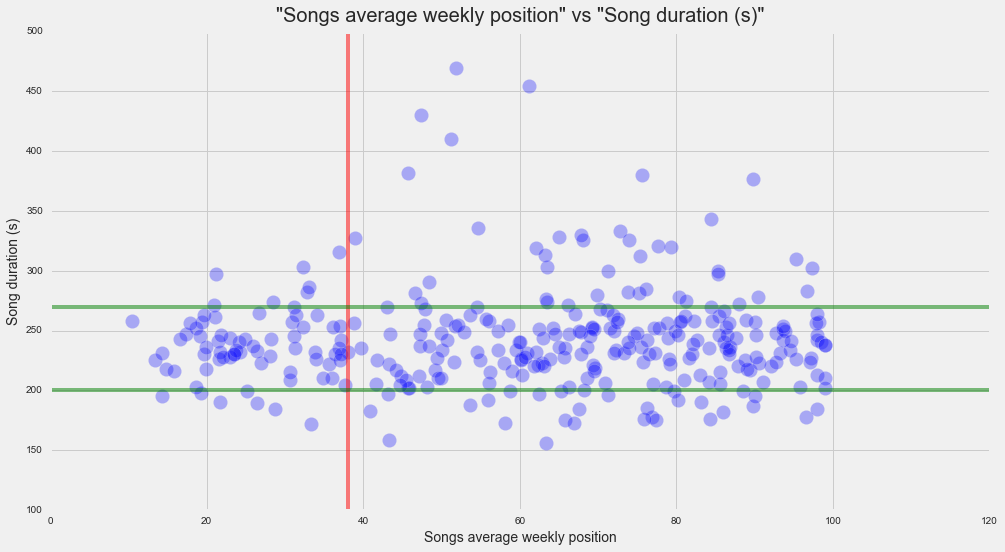

In [39]:
fig, ax = plt.subplots(1,1, figsize = (15,8))

ax.scatter(x = bb_small_df["Avg_position"], y = bb_small_df['song_len'],\
                s = 200, alpha = 0.3)

ax.axvline(x = 38, color = 'r', alpha = 0.5)
ax.axhline(y = 270, color = 'g', alpha = 0.5)
ax.axhline(y = 200, color = 'g', alpha = 0.5)

ax.set_title('"Songs average weekly position" vs "Song duration (s)"', fontsize = 20, y = 1.01)
ax.set_xlabel("Songs average weekly position", fontsize = 14);
ax.set_ylabel("Song duration (s)", fontsize = 14);

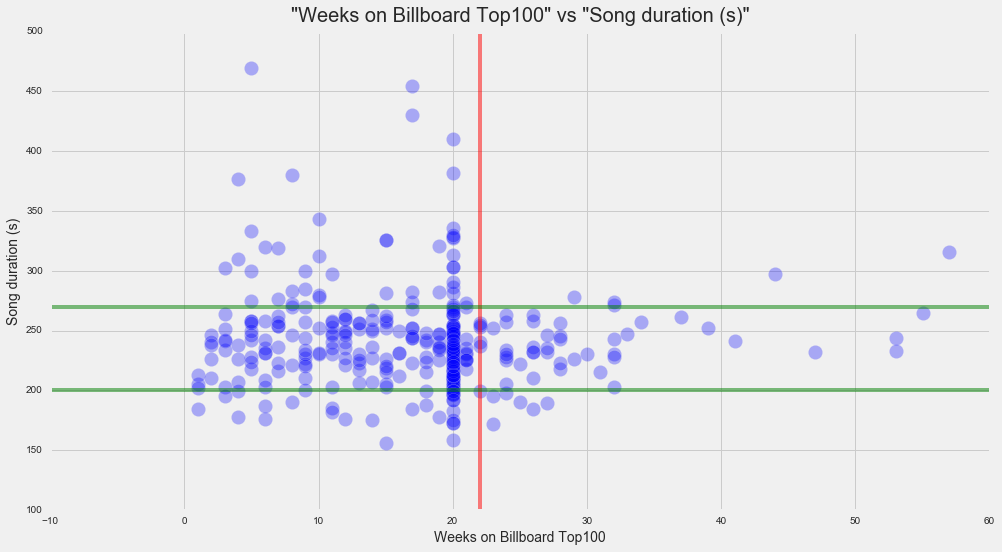

In [40]:
fig, ax = plt.subplots(1,1, figsize = (15,8))

ax.scatter(x = bb_small_df["time_on_bb_weeks"], y = bb_small_df['song_len'],\
                s = 200, alpha = 0.3)

ax.axvline(x = 22, color = 'r', alpha = 0.5)
ax.axhline(y = 270, color = 'g', alpha = 0.5)
ax.axhline(y = 200, color = 'g', alpha = 0.5)

ax.set_title('"Weeks on Billboard Top100" vs "Song duration (s)"', fontsize = 20, y = 1.01)
ax.set_xlabel("Weeks on Billboard Top100", fontsize = 14);
ax.set_ylabel("Song duration (s)", fontsize = 14);

#### Comments:

There were no clear relationship linking song duration to weeks on Top100 and average position. Nevertheless, there were 2 useful conclusions:

1. Songs over 300 seconds (5 minutes) hardly made it better than average position of 40.
2. Songs over 300 seconds (5 minutes) hardly made it past 20 weeks on the Top100.

#### So, who were the unicorns?

In [107]:
unicorn = bb_df[(bb_df["Avg_position"] < 38) & (bb_df['time_on_bb_weeks'] > 32)]\
[['artist.inverted', 'genre','track', 'Avg_position', 'time_on_bb_weeks']]
unicorn.sort_values('Avg_position', inplace = True)


new_col = ['Artists', 'Genre', "Track_name", "Mean_position", "Weeks_on_chart"]
unicorn.columns = new_col
unicorn

,Artists,Genre,Track_name,Mean_position,Weeks_on_chart
2,Savage Garden,Rock,I Knew I Loved You,17.363636,33
15,matchbox twenty,Rock,Bent,18.641026,39
20,"Braxton, Toni",Rock,He Wasn't Man Enough,21.000000,37
28,Joe,Rock'n'roll,I Wanna Know,21.204545,44
12,Vertical Horizon,Rock'n'roll,Everything You Want,21.439024,41
17,"Hill, Faith",Rap,Breathe,23.018868,53
24,3 Doors Down,Rock,Kryptonite,26.471698,53
9,Lonestar,Country,Amazed,26.727273,55
47,Nelly,Rap,(Hot S**t) Country Grammar,30.882353,34
13,Creed,Rock'n'roll,With Arms Wide Open,33.829787,47


### d. Pivot tables

In [41]:

pd.pivot_table(bb_small_df, index=['Season_entered'], \
               values= ["time_on_bb_weeks", "Avg_position"],\
              aggfunc = [np.median, np.std, max, min])

median                           std                   \
               Avg_position time_on_bb_weeks Avg_position time_on_bb_weeks   
Season_entered                                                               
Autumn            60.000000               20    25.269519         9.245136   
Spring            62.941176               19    24.002583         9.870410   
Summer            66.001754               19    23.105534         8.316401   
Winter            65.750000               14    23.886356         8.598126   

                        max                           min                   
               Avg_position time_on_bb_weeks Avg_position time_on_bb_weeks  
Season_entered                                                              
Autumn                 99.0               57    14.333333                1  
Spring                 98.0               53    15.850000                3  
Summer                 99.0               55    13.458333                1  
Winter                 99.0               44    10.500000                2

In [42]:

pd.pivot_table(bb_small_df, index=['Time_to_peak_bin'], \
               values= ["time_on_bb_weeks", "Avg_position"],\
              aggfunc = [np.mean, np.median, np.std, max, min])

mean                        median                   \
                 Avg_position time_on_bb_weeks Avg_position time_on_bb_weeks   
Time_to_peak_bin                                                               
Peaked_early        65.923347        14.088050    71.142857               15   
Peaked_late         56.083989        19.411392    56.600000               20   

                          std                           max                   \
                 Avg_position time_on_bb_weeks Avg_position time_on_bb_weeks   
Time_to_peak_bin                                                               
Peaked_early        23.490184         8.082160         99.0               39   
Peaked_late         23.657711         9.275768         98.5               57   

                          min                   
                 Avg_position time_on_bb_weeks  
Time_to_peak_bin                                
Peaked_early         10.50000                1  
Peaked_late          14.26087                2

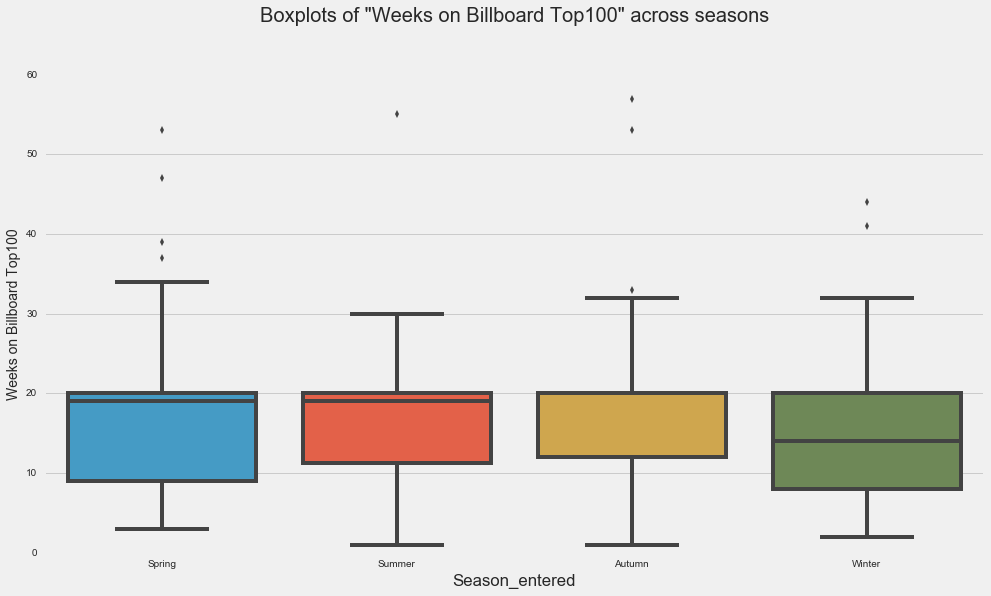

In [105]:
fig, ax = plt.subplots(1,1, figsize = (15,8))

ax = sns.boxplot(data = bb_small_df, x = "Season_entered", y = 'time_on_bb_weeks',\
                order = ['Spring', "Summer", "Autumn", "Winter"])

ax.set_title('Boxplots of "Weeks on Billboard Top100" across seasons', fontsize = 20, y = 1.1)
#ax.get_xaxis().set_visible(False)
ax.set_ylabel("Weeks on Billboard Top100", fontsize = 14)
plt.savefig('boxplot_pos_vs_season.png');

#### Comments:

There is not much between the seasons in terms of staying longer on the charts. Songs which entered in winter had shorter  median stays on the charts (~ 14 weeks) compared to the rest of the seasons (~20). The songs which stayed the longest on the charts entered the charts in Autumn.

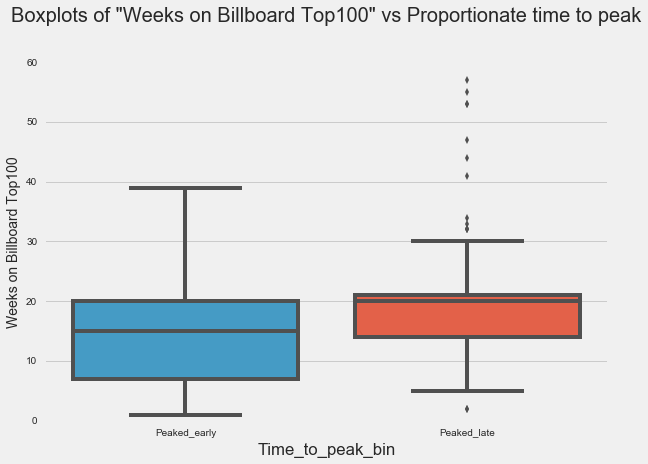

In [104]:
fig, ax = plt.subplots(1,1, figsize = (9,6))

ax = sns.boxplot(data = bb_small_df, x = "Time_to_peak_bin", y = 'time_on_bb_weeks',\
                order = ['Peaked_early', 'Peaked_late'])

ax.set_title('Boxplots of "Weeks on Billboard Top100" vs Proportionate time to peak', fontsize = 20, y = 1.1)
#ax.get_xaxis().set_visible(False)
ax.set_ylabel("Weeks on Billboard Top100", fontsize = 14)
plt.savefig('boxplot_time_vs_peak.png');

#### Comments:

The proportionate time taken to peak was binned into 2 categories "Peaked_early" and "Peaked_late". Songs which took less than half of the time they were on the charts to reach their peak were binned as "Peaked_early" while the rest were binned as "Peaked_late".

Songs which peaked proportionately earlier had a higher variance of stay duration on the charts, nevertheless, they have lower median duration on charts and also a lower high compared to songs which peaked late.

## 7. Multivariate Analyses

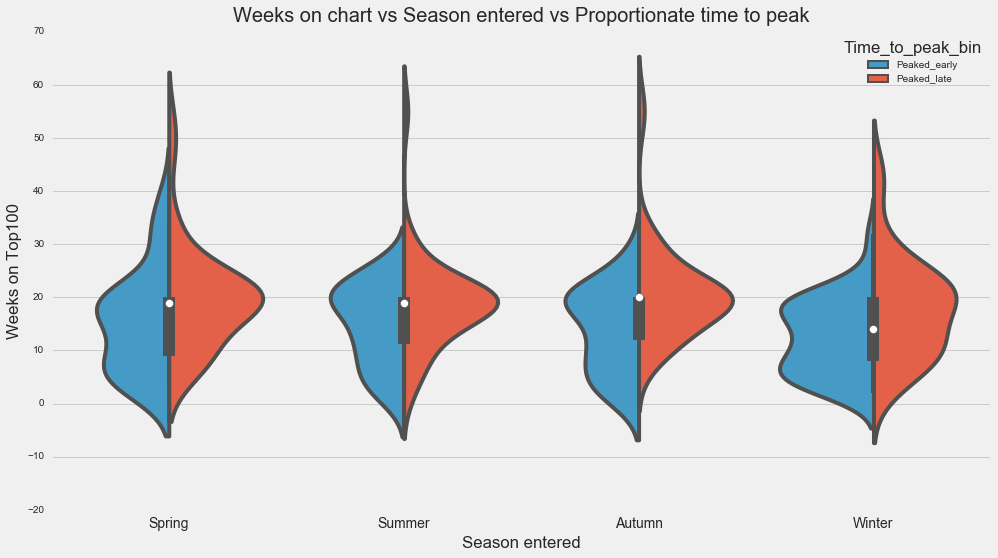

In [102]:
# Violin plots of Weeks on chart vs season entered vs Proportionate time to peak
fig, ax = plt.subplots(1,1, figsize = (15,8))

ax = sns.violinplot(x="Season_entered", y="time_on_bb_weeks", hue="Time_to_peak_bin",\
                     data=bb_small_df, split=True,\
                   order = ['Spring', "Summer", "Autumn", "Winter"])
ax.set_xlabel('Season entered')
ax.set_xticklabels(['Spring', "Summer", "Autumn", "Winter"], fontsize = 14)
ax.set_ylabel('Weeks on Top100')

ax.set_title('Weeks on chart vs Season entered vs Proportionate time to peak', fontsize = 20, y = 1.01)
plt.savefig('violin_season_vs_time_vs_peak.png');

#### Comments:

In this violinplot, we see that winter had the lowest median as well as lowest high in terms of weeks on chart, while songs that peaked later stayed on the charts longer across all seasons.

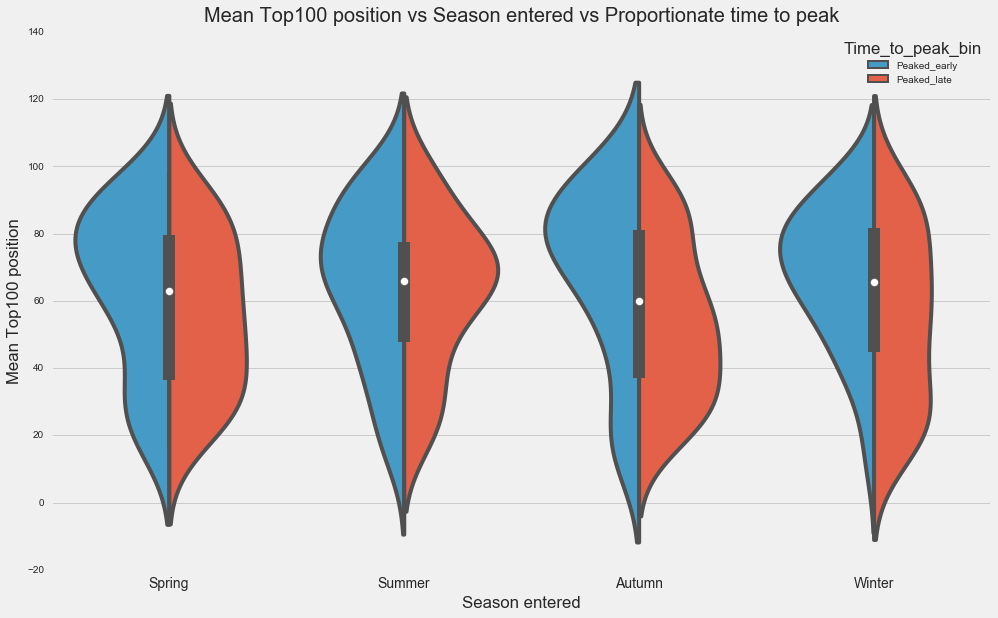

In [103]:
# Violin plots of Avg Position vs season entered vs Proportionate time to peak
fig, ax = plt.subplots(1,1, figsize = (15,9))

ax = sns.violinplot(x="Season_entered", y="Avg_position", hue="Time_to_peak_bin",\
                     data=bb_small_df, split=True,\
                   order = ['Spring', "Summer", "Autumn", "Winter"])
ax.set_xlabel('Season entered')
ax.set_xticklabels(['Spring', "Summer", "Autumn", "Winter"], fontsize = 14)
ax.set_ylabel('Mean Top100 position')

ax.set_title('Mean Top100 position vs Season entered vs Proportionate time to peak', fontsize = 20, y = 1.01)
plt.savefig('violin_season_vs_pos_vs_peak.png');

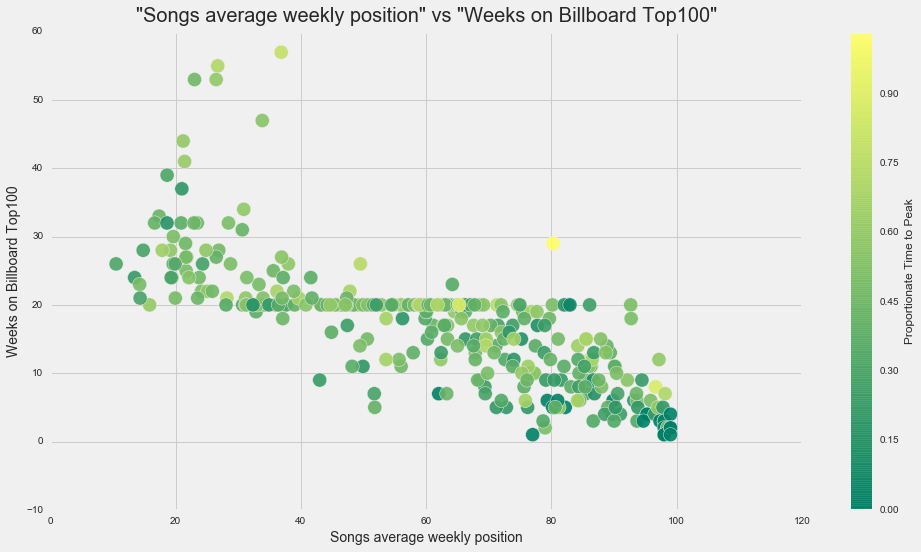

In [99]:
# Multivariate scatter plot
# Avg Position vs season entered vs Proportionate time to peak

import matplotlib.cm as cm

fig, ax = plt.subplots(1,1, figsize = (15,8))

plt.scatter(x = bb_small_df["Avg_position"], y = bb_small_df['time_on_bb_weeks'],\
                s = 200, alpha = 0.9,\
          c = bb_small_df['Time_to_peak_prop'], cmap='summer')

#ax.axvline(x = 38, color = 'r', alpha = 0.5)
#ax.axhline(y = 22, color = 'g', alpha = 0.5)

ax.set_title('"Songs average weekly position" vs "Weeks on Billboard Top100"', fontsize = 20, y = 1.01)
ax.set_xlabel("Songs average weekly position", fontsize = 14)
ax.set_ylabel("Weeks on Billboard Top100", fontsize = 14)

cb = plt.colorbar()
cb.set_label('Proportionate Time to Peak', rotation = 90, fontsize = 12)
plt.savefig('scatter_pos_vs_time_vs_peak.png')

#### Comments:

There doesn't seem to be a clear relationship between proportionate time to peak and being a unicorn song.

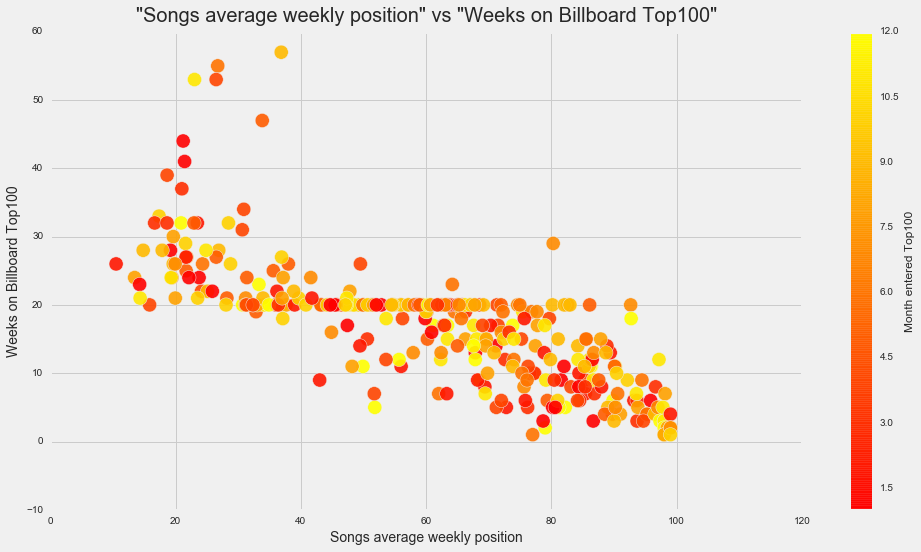

In [100]:
# Multivariate scatter plot
# Avg Position vs season entered vs Proportionate time to peak

import matplotlib.cm as cm

fig, ax = plt.subplots(1,1, figsize = (15,8))

plt.scatter(x = bb_small_df["Avg_position"], y = bb_small_df['time_on_bb_weeks'],\
                s = 200, alpha = 0.9,\
          c = bb_small_df['month_entered'], cmap='autumn')

#ax.axvline(x = 38, color = 'r', alpha = 0.5)
#ax.axhline(y = 22, color = 'g', alpha = 0.5)

ax.set_title('"Songs average weekly position" vs "Weeks on Billboard Top100"', fontsize = 20, y = 1.01)
ax.set_xlabel("Songs average weekly position", fontsize = 14)
ax.set_ylabel("Weeks on Billboard Top100", fontsize = 14)

cb = plt.colorbar()
cb.set_label('Month entered Top100', rotation = 90, fontsize = 12)
cb.ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12], rotation = 90)

plt.savefig('scatter_pos_vs_time_vs_mth.png');

#### Comments:

Similarly, month which the song first entered the Top100 charts doesn't seem to have a clear relationship to its performance in terms of average position nor duration of stay on the chart.

## 8. Statistical analyses

### a. Time on Top100 - Seasonal comparison

H$_o$: On average, songs which entered Top100 in Autumn lasted longer on the Top 100 charted than songs which entered in other seasons.

H$_a$: On average, songs which entered Top100 in Autumn did not last longer on the Top 100 charted than songs which entered in other seasons.

$$H_o: \mu_a - \mu_{ot} > 0$$

$$H_a: \mu_a - \mu_{ot} <= 0$$

$$where\ \mu_a\ is\ the\ mean\ of\ time\ on\ Top100\ for\ autumn\ songs\ ;$$
$$and\ \mu_{ot}\ is\ the\ mean\ of\ time\ on\ Top100\ for\ all\ other\ songs\ $$

In [49]:
from scipy import stats

In [79]:
# Normality test for distribution of "time_on_bb_weeks"

stats.normaltest(bb_small_df['time_on_bb_weeks'])

NormaltestResult(statistic=67.532580429738815, pvalue=2.1651425019300636e-15)

In [80]:
# Normality test for distribution of "Avg_position"

stats.normaltest(bb_small_df['Avg_position'])

NormaltestResult(statistic=72.897717125810644, pvalue=1.4806821962692552e-16)

#### Comments:

With such small p values, it is highly unlikely that the distribution of "time_on_bb_weeks" falls into a normal distribution. Therefore, a 2-sample t-test is not applicable here.

The use of t-tests requires the distribution to have the following:
[Source](http://www.stat.purdue.edu/~tqin/system101/method/method_two_t_sas.htm)

1. There is one continuous dependent variable and one categorical independent variable (with 2 levels);
2. The two samples are independent;
3. The two samples follow normal distributions, and can be done with Normality check.



In [61]:
# Statistical testing for autumn songs

autumn_timeon100 = (bb_small_df[bb_small_df['Season_entered'] == "Autumn"]['time_on_bb_weeks'])
other_timeon100_mean = np.mean(bb_small_df[bb_small_df['Season_entered'] != "Autumn"]['time_on_bb_weeks'])

print "The mean time on Top100 for autumn songs is", np.mean(autumn_timeon100), "weeks."
print "The mean time on Top100 for all other songs is", other_timeon100_mean, "weeks."
print
aut_diff = np.mean(autumn_timeon100)-other_timeon100_mean
print "Difference between autumn and other songs is", aut_diff, "weeks."

one_sample = stats.ttest_1samp(autumn_timeon100, other_timeon100_mean)

print "The t-statistic is %.3f and the p-value is %.3f." % one_sample

The mean time on Top100 for autumn songs is 18.049382716 weeks.
The mean time on Top100 for all other songs is 16.2923728814 weeks.

Difference between autumn and other songs is 1.75700983469 weeks.
The t-statistic is 1.710 and the p-value is 0.091.


#### Comments:

Autumn songs stayed on the Top100 for statistically significantly longer time than other songs, at $\alpha$ = 10%, p-value = 0.091.

### b. Resampling random shuffling

In [69]:
# Creating a separate dataframe using "Season_entered" and "time_on_bb_weeks" to conduct shuffling and resampling test.

shuf_season_df = bb_small_df[['Season_entered', 'time_on_bb_weeks']]

In [67]:

# Count of desired results
m = 0

# Number of random trials
trial_num = 10000

for i in range(trial_num):
    
    # Shuffle the season labels for each trial randomly
    shuf_season_df.loc[:,['time_on_bb_weeks']] = np.random.permutation(shuf_season_df['time_on_bb_weeks'])
    
    # Extract the required means
    aut_mean = np.mean(shuf_season_df[shuf_season_df['Season_entered']=="Autumn"])
    oth_mean = np.mean(shuf_season_df[shuf_season_df['Season_entered']!="Autumn"])
    
    # Add to count if difference is more than or equal to difference we obtained.
    if aut_mean[0] - oth_mean[0] >= aut_diff:
        m += 1

# Derive probability of having autumn songs higher than other songs within the number of trials.
p = m / float(trial_num)
p


0.0712

#### Comments:

Based on a resampling random shuffle of 10,000 trials, there was only about 7.12% chance of getting the same mean differences between songs which entered in Autumn and the rest of the seasons. Therefore, the difference can be interpreted as significant and therefore, songs which entered Top100 in Autumn stayed on the charts significantly longer than songs entering in the rest of the season.

### c. Average position

In [71]:
# Statistical testing for autumn songs

peakearly = (bb_small_df[bb_small_df['Time_to_peak_bin'] == "Peaked_early"]['Avg_position'])
peaklate = np.mean(bb_small_df[bb_small_df['Time_to_peak_bin'] != "Peaked_early"]['Avg_position'])

print "The average Top100 position for songs which peaked early was", np.mean(peakearly)
print "The average Top100 position for songs which peaked early was", peaklate
print
pos_diff = np.mean(peakearly)-peaklate
print "Average positional difference between songs which peaked early and peaked late was", pos_diff

The average Top100 position for songs which peaked early was 65.9233473652
The average Top100 position for songs which peaked early was 56.0839893793

Average positional difference between songs which peaked early and peaked late was 9.83935798587


In [76]:
# Creating another dataframe using "Avg_position" and "Time_to_peak_prop" to conduct shuffling and resampling test.

shuf_peak_df = bb_small_df[['Avg_position', 'Time_to_peak_bin']]

In [78]:

# Count of desired results
m = 0

# Number of random trials
trial_num = 10000

for i in range(trial_num):
    
    # Shuffle the season labels for each trial randomly
    shuf_peak_df.loc[:,['Time_to_peak_bin']] = np.random.permutation(shuf_peak_df['Time_to_peak_bin'])
    
    # Extract the required means
    early_mean = np.mean(shuf_peak_df[shuf_peak_df['Time_to_peak_bin']=="Peaked_early"])
    late_mean = np.mean(shuf_peak_df[shuf_peak_df['Time_to_peak_bin']!="Peaked_early"])
    
    # Add to count if difference is more than or equal to difference we obtained.
    if early_mean[0] - late_mean[0] >= pos_diff:
        m += 1

# Derive probability of having autumn songs higher than other songs within the number of trials.
p = m / float(trial_num)
p


0.0003

#### Comments:

After random resampling with 10,000 trials, the probability of getting the same positional differences or better was 0.03%, which meant that the difference (9.89 places) was statistically significant and songs that peaked early had a better average position compared with songs which peaked later.

## 9. Conclusion

We started with 2 hypotheses about the dataset:

1. Songs that entered Top100 during autumn months (Sep, Oct and Nov) stayed in Top100 longer.
2. Songs that peaked quickly had lower average weekly positions.

We then proceeded to load the data and clean the dataset, conduct sense-checking, added new features and filter out the features which we were interested in.

Once the data was adequately cleaned, univariate, bivariate and multivariate analyses were conducted via the use of a series of visualization charts.

Finally, we conducted statistical tests on both our hypotheses and found the following:

1. Songs that entered Top100 during autumn months (Sep, Oct and Nov) stayed in Top100 longer (over 90% confidence).
2. Songs that peaked quickly had lower average weekly positions (over 99% confidence).

While conducting the analyses, we side-tracked a little to figure out the unicorn songs in 2000 which satisfied our criteria of __staying high__ on the Top100 charts for a __long time__.